In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2017-01-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2017_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-01-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6906,남구,14850,남구,7944,115.03%,"10,878"
1,2017-01-05,간장,오복왕표 0.9ℓ 1병,5823,남구,6250,남구,427,7.33%,"6,037"
2,2017-01-05,고등어,30㎝정도 500g 1마리,4700,남구,4746,남구,46,0.98%,"4,723"
3,2017-01-05,달걀,오경슈퍼란60g정도 10개,3290,남구,4980,남구,1690,51.37%,"4,135"
4,2017-01-05,닭고기,육계 1.0㎏,4980,남구,5228,남구,248,4.98%,"5,104"
5,2017-01-05,대파,1.0㎏,4250,남구,5190,남구,940,22.12%,"4,720"
6,2017-01-05,돼지고기,삼겹살 500g,8950,남구,9350,남구,400,4.47%,"9,150"
7,2017-01-05,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5300,남구,935,21.42%,"4,833"
8,2017-01-05,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676
9,2017-01-05,맥주,하이트 500㎖ 1병,1320,남구,1330,남구,10,0.76%,"1,325"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2017-04-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2017_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-04-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,14850,남구,7425,100.0%,"11,138"
1,2017-04-06,간장,오복왕표 0.9ℓ 1병,5770,남구,5818,남구,48,0.83%,"5,794"
2,2017-04-06,고등어,30㎝정도 500g 1마리,3921,남구,7779,남구,3858,98.39%,"5,850"
3,2017-04-06,달걀,오경슈퍼란60g정도 10개,2990,남구,3380,남구,390,13.04%,"3,185"
4,2017-04-06,닭고기,육계 1.0㎏,5180,남구,6657,남구,1477,28.51%,"5,919"
5,2017-04-06,대파,1.0㎏,4685,남구,5085,남구,400,8.54%,"4,885"
6,2017-04-06,돼지고기,삼겹살 500g,9950,남구,12800,남구,2850,28.64%,"11,375"
7,2017-04-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5300,남구,935,21.42%,"4,833"
8,2017-04-06,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676
9,2017-04-06,맥주,하이트 500㎖ 1병,1400,남구,1410,남구,10,0.71%,"1,405"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2017-07-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2017_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-07-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,남구,16425,남구,8250,100.92%,"12,300"
1,2017-07-06,간장,오복왕표 0.9ℓ 1병,6300,남구,6300,남구,0,0.0%,"6,300"
2,2017-07-06,고등어,30㎝정도 500g 1마리,4656,남구,5057,남구,401,8.61%,"4,857"
3,2017-07-06,달걀,오경슈퍼란60g정도 10개,3190,남구,3780,남구,590,18.5%,"3,485"
4,2017-07-06,닭고기,육계 1.0㎏,5490,남구,6875,남구,1385,25.23%,"6,183"
5,2017-07-06,대파,1.0㎏,2828,남구,3338,남구,510,18.03%,"3,083"
6,2017-07-06,돼지고기,삼겹살 500g,9450,남구,17950,남구,8500,89.95%,"13,700"
7,2017-07-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5380,남구,1015,23.25%,"4,873"
8,2017-07-06,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676
9,2017-07-06,맥주,하이트 500㎖ 1병,1400,남구,1410,남구,10,0.71%,"1,405"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2017-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2017_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,남구,16135,남구,7960,97.37%,"12,155"
1,2017-10-12,간장,오복왕표 0.9ℓ 1병,6300,남구,6300,남구,0,0.0%,"6,300"
2,2017-10-12,고등어,30㎝정도 500g 1마리,3500,남구,3694,남구,194,5.54%,"3,597"
3,2017-10-12,달걀,오경슈퍼란60g정도 10개,2680,남구,2880,남구,200,7.46%,"2,780"
4,2017-10-12,닭고기,육계 1.0㎏,4980,남구,5290,남구,310,6.22%,"5,135"
5,2017-10-12,대파,1.0㎏,3412,남구,5190,남구,1778,52.11%,"4,301"
6,2017-10-12,돼지고기,삼겹살 500g,10450,남구,16900,남구,6450,61.72%,"13,675"
7,2017-10-12,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5380,남구,1015,23.25%,"4,873"
8,2017-10-12,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676
9,2017-10-12,맥주,하이트 500㎖ 1병,1400,남구,1410,남구,10,0.71%,"1,405"


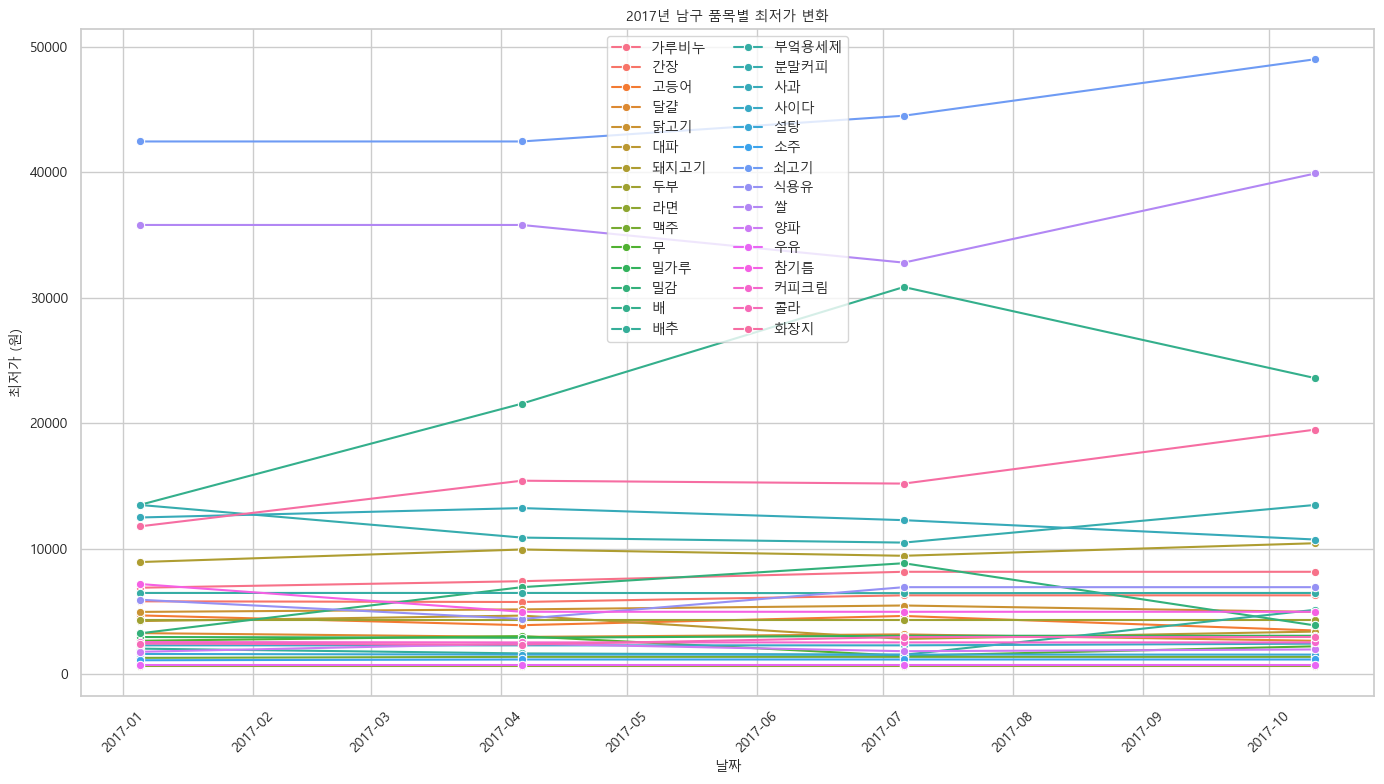

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2017_1q.csv")
q2 = pd.read_csv("남구2017_2q.csv")
q3 = pd.read_csv("남구2017_3q.csv")
q4 = pd.read_csv("남구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2017_min.csv", index=False, encoding="utf-8-sig")

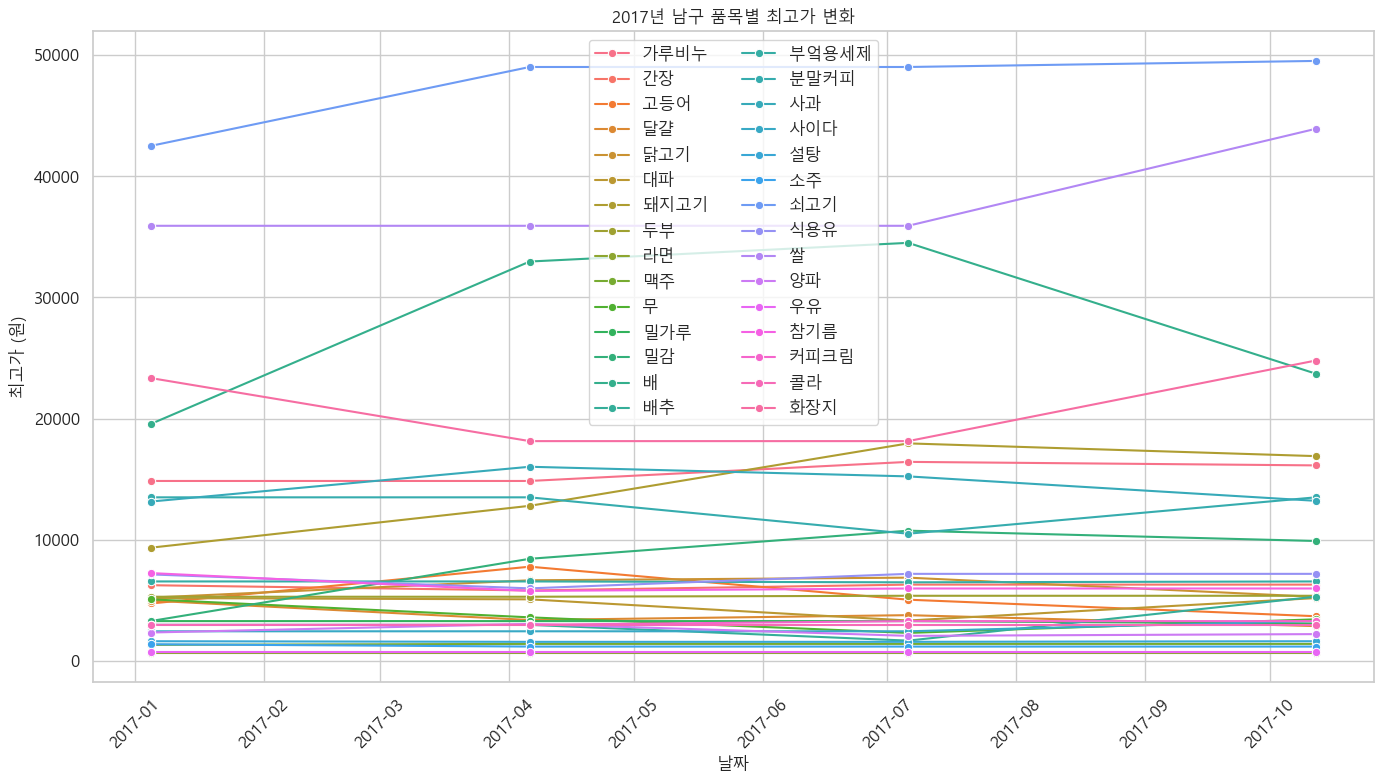

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2017_1q.csv")
q2 = pd.read_csv("남구2017_2q.csv")
q3 = pd.read_csv("남구2017_3q.csv")
q4 = pd.read_csv("남구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2017_max.csv", index=False, encoding="utf-8-sig")